##데이터셋 로드 및 전처리

###데이터셋 로드

In [19]:
import pandas as pd
import numpy as np

In [20]:
!pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_vehicle_silhouettes = fetch_ucirepo(id=149)

# data (as pandas dataframes)
X = statlog_vehicle_silhouettes.data.features
y = statlog_vehicle_silhouettes.data.targets

In [ ]:
X.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,845.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.671006,44.937352,82.044917,168.791962,61.842790,8.646572,168.654846,41.078014,20.606383,147.872340,188.552009,439.660757,175.029551,72.524823,6.455083,12.583924,188.718676,195.627660
std,8.236474,6.447208,15.847882,33.618278,9.184892,5.105899,33.712309,8.851226,2.676641,15.151082,31.466244,176.898077,33.419271,7.701762,5.411121,8.931398,8.483959,7.434743
min,73.000000,33.000000,36.000000,73.000000,47.000000,2.000000,6.000000,26.000000,17.000000,20.000000,127.000000,184.000000,109.000000,59.000000,0.000000,0.000000,19.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.250000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.750000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.750000,9.000000,19.000000,193.000000,201.000000
max,119.000000,100.000000,112.000000,333.000000,199.000000,73.000000,265.000000,162.000000,40.000000,188.000000,320.000000,1018.000000,401.000000,135.000000,72.000000,41.000000,206.000000,211.000000


In [10]:
y.value_counts()

,count
class,
bus,217
saab,217
opel,212
van,199
204,1


###데이터셋 전처리

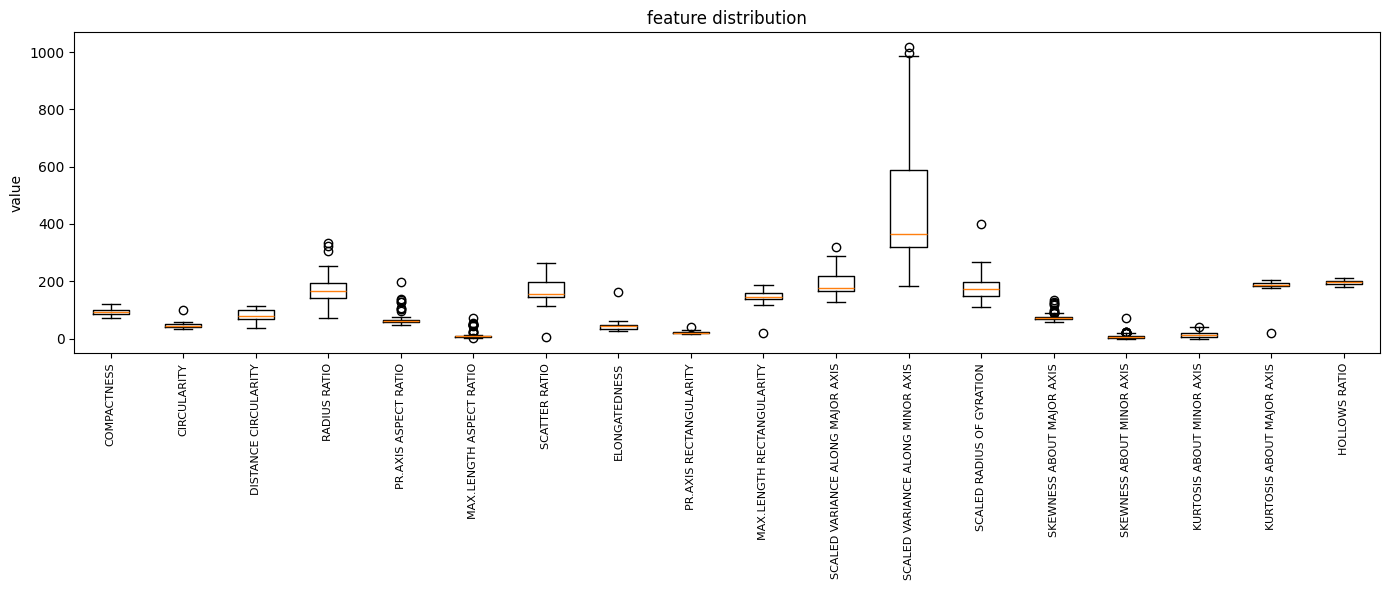

In [11]:
#Boxplot 이용 시각화

import matplotlib.pyplot as plt

cols = X.select_dtypes(include='number').columns.tolist()

data = [X[col].dropna().values for col in cols]

fig, ax = plt.subplots(figsize=(14, 6))
ax.boxplot(data)
ax.set_xticklabels(cols, rotation=90, fontsize=8)
ax.set_ylabel('value')
ax.set_title('feature distribution')
plt.tight_layout()
plt.show()

In [12]:
#z-score 기준 이상치 제거
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(X, nan_policy='omit'))

extreme_mask = (z_scores > 3).any(axis=1)

X_extreme = X.loc[~extreme_mask].copy()

print(f"original X: {X.shape[0]}")
print(f"After delete: {X_extreme.shape[0]}")

original X: 846
After delete: 827


In [13]:
y_extreme = y.loc[~extreme_mask].copy()

In [14]:
len(y_extreme)

827

In [15]:
y_extreme.value_counts()

,count
class,
saab,214
opel,212
bus,209
van,192


In [16]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

#Scaling 이후 다시 Data Frame으로 변환
scaler = StandardScaler()
arr = scaler.fit_transform(X_extreme)
X_scaled = pd.DataFrame(arr, columns=X_extreme.columns, index=X_extreme.index)

In [17]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_series = y_extreme['class']
y_array  = le.fit_transform(y_series)

#인코딩 후 다시 Data Frame으로 변환
y_encoded = pd.DataFrame(
    y_array,
    index=y_extreme.index,
    columns=['class']
)

In [18]:
y_encoded.value_counts()

,count
class,
2,214
1,212
0,209
3,192


###데이터셋 분할

In [25]:
#train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_test.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
203,1.161386,1.669988,1.147003,0.823863,0.142751,1.272473,1.340511,-1.289045,1.367925,1.878864,0.988989,1.333790,1.407097,0.151289,0.738347,0.165502,-0.324076,-0.230839
781,-0.687087,-0.456009,-1.140089,-0.523453,0.142751,-0.077251,-1.176807,1.284999,-1.004547,-0.403217,-1.249528,-1.070625,-0.412214,-1.432453,-0.684993,-1.189646,2.276396,1.936982
273,0.298766,0.034606,-0.123604,-0.178791,0.320812,0.372657,-0.685623,0.641488,-0.609135,0.011707,-0.882011,-0.703850,-0.412214,-1.274079,-0.278324,-0.286214,1.626278,1.530515
359,0.791692,0.688759,0.892882,1.199858,0.320812,0.372657,0.542337,-0.774236,0.577101,0.564939,0.487829,0.477981,0.058297,-1.590828,-0.684993,-0.850859,1.301219,1.259538
175,-0.687087,-0.783085,-0.250664,0.573199,2.101427,-0.977068,-0.317235,-0.002023,-0.213723,-0.956449,-0.080153,-0.337075,-0.819991,0.151289,-1.091661,-0.173285,0.651101,0.175628


In [ ]:
y_test.head()

,class
203,1
781,3
273,3
359,1
175,0


##MLP 모델링

###모델링 및 테스트

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# y는 1차원 배열로 변환
y_train_arr = y_train.values.ravel()
y_test_arr  = y_test.values.ravel()

# 하이퍼파라미터 튜닝
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'alpha': [1e-4, 1e-3, 1e-2],
    'learning_rate_init': [1e-3, 1e-2]
}

mlp = MLPClassifier(max_iter=200, random_state=42)
grid = GridSearchCV(
    mlp,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train_arr)
best_mlp = grid.best_estimator_
print(" Best hyperparameters:", grid.best_params_)

 Best hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}


In [27]:
#테스트 점수
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, best_mlp.predict(X_test))
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.831


### 불확실성 확인

In [28]:
from scipy.stats import entropy

# 테스트셋에 대한 예측 확률
probs = best_mlp.predict_proba(X_test)

# 네 가지 Uncertainty Measure 계산
# Confidence
confidence = np.max(probs, axis=1)

# Margin
sorted_p = np.sort(probs, axis=1)
p1, p2 = sorted_p[:, -1], sorted_p[:, -2]
margin = p1 - p2

# Predictive Entropy (normalized to [0,1])
C = probs.shape[1]
entropy_vals = entropy(probs.T) / np.log(C)

# Gini Impurity (normalized to [0,1])
gini_impurity = (1 - np.sum(probs**2, axis=1)) / (1 - 1/C)

#결과
df_unc = pd.DataFrame({
    'confidence': confidence,
    'margin': margin,
    'entropy': entropy_vals,
    'gini_impurity': gini_impurity
}, index=X_test.index)


df_unc

,confidence,margin,entropy,gini_impurity
203,0.985156,0.970318,5.574728e-02,3.899586e-02
781,0.564811,0.129625,4.939541e-01,6.554693e-01
273,0.999978,0.999959,1.934432e-04,5.886072e-05
359,0.965985,0.931970,1.070720e-01,8.762156e-02
175,1.000000,1.000000,3.794108e-07,7.604245e-08
...,...,...,...,...
642,0.561970,0.123941,4.944477e-01,6.564260e-01
307,0.994627,0.989255,2.412012e-02,1.424988e-02
220,0.997800,0.995599,1.129839e-02,5.854629e-03
546,0.999998,0.999996,1.954276e-05,4.968912e-06


###신뢰도 낮은 row 제거 후 성능 개선

In [29]:
# 1) 불확실성 기준(Confidence)으로 삭제할 threshold 설정 - 0.9 미만인 행 제거
threshold = 0.90

# 2) mask 생성 (confidence ≥ threshold 라면 남기고, 나머지 제거)
mask = df_unc['confidence'] >= threshold

# 3) Test set 필터링
X_test_clean = X_test.loc[mask].copy()
y_test_clean = y_test.loc[mask].copy()
df_unc_clean = df_unc.loc[mask].copy()

# 4) 결과 확인
print(f"원본 Test 샘플 수: {X_test.shape[0]}")
print(f"제거 후 Test 샘플 수: {X_test_clean.shape[0]}")

# 5) 다시 Accuracy 계산
from sklearn.metrics import accuracy_score
test_acc_clean = accuracy_score(y_test_clean.values.ravel(), best_mlp.predict(X_test_clean))
print(f"Confidence 필터링 후 Test Accuracy: {test_acc_clean:.3f}")

원본 Test 샘플 수: 166
제거 후 Test 샘플 수: 129
Confidence 필터링 후 Test Accuracy: 0.915


In [30]:
# 1) 불확실성 기준(margin)으로 삭제할 threshold 설정 - 0.9 미만인 행 제거
threshold = 0.90

# 2) mask 생성 (margin ≥ threshold 라면 남기고, 나머지 제거)
mask = df_unc['margin'] >= threshold

# 3) Test set 필터링
X_test_clean = X_test.loc[mask].copy()
y_test_clean = y_test.loc[mask].copy()
df_unc_clean = df_unc.loc[mask].copy()

# 4) 결과 확인
print(f"원본 Test 샘플 수: {X_test.shape[0]}")
print(f"제거 후 Test 샘플 수: {X_test_clean.shape[0]}")

# 5) 다시 Accuracy 계산
from sklearn.metrics import accuracy_score
test_acc_clean = accuracy_score(y_test_clean.values.ravel(), best_mlp.predict(X_test_clean))
print(f"margin 필터링 후 Test Accuracy: {test_acc_clean:.3f}")

원본 Test 샘플 수: 166
제거 후 Test 샘플 수: 123
margin 필터링 후 Test Accuracy: 0.919


In [35]:
# 1) 불확실성 기준(entropy)으로 삭제할 threshold 설정 - 0.9 미만인 행 제거
threshold = 0.1

# 2) mask 생성 (entropy ≥ threshold 라면 남기고, 나머지 제거)
mask = df_unc['entropy'] <= threshold

# 3) Test set 필터링
X_test_clean = X_test.loc[mask].copy()
y_test_clean = y_test.loc[mask].copy()
df_unc_clean = df_unc.loc[mask].copy()

# 4) 결과 확인
print(f"원본 Test 샘플 수: {X_test.shape[0]}")
print(f"제거 후 Test 샘플 수: {X_test_clean.shape[0]}")

# 5) 다시 Accuracy 계산
from sklearn.metrics import accuracy_score
test_acc_clean = accuracy_score(y_test_clean.values.ravel(), best_mlp.predict(X_test_clean))
print(f"entropy 필터링 후 Test Accuracy: {test_acc_clean:.3f}")

원본 Test 샘플 수: 166
제거 후 Test 샘플 수: 116
entropy 필터링 후 Test Accuracy: 0.940


In [36]:
# 1) 불확실성 기준(gini_impurity)으로 삭제할 threshold 설정 - 0.9 미만인 행 제거
threshold = 0.1

# 2) mask 생성 (gini_impurity ≥ threshold 라면 남기고, 나머지 제거)
mask = df_unc['gini_impurity'] <= threshold

# 3) Test set 필터링
X_test_clean = X_test.loc[mask].copy()
y_test_clean = y_test.loc[mask].copy()
df_unc_clean = df_unc.loc[mask].copy()

# 4) 결과 확인
print(f"원본 Test 샘플 수: {X_test.shape[0]}")
print(f"제거 후 Test 샘플 수: {X_test_clean.shape[0]}")

# 5) 다시 Accuracy 계산
from sklearn.metrics import accuracy_score
test_acc_clean = accuracy_score(y_test_clean.values.ravel(), best_mlp.predict(X_test_clean))
print(f"gini_impurity 필터링 후 Test Accuracy: {test_acc_clean:.3f}")

원본 Test 샘플 수: 166
제거 후 Test 샘플 수: 120
gini_impurity 필터링 후 Test Accuracy: 0.933
